# LAIsim demonstration notebook

This Jupyter Notebook demonstrates using pharmacokinetic data in a simple flip-flop model to simulate plasma levels using [LAIsim](https://github.com/ClairePower/LAIsim).

In [6]:
import LAIsim
import numpy as np
import matplotlib.pyplot as plt
from hair import Hair
from analyser import Analyser
from scipy.signal import find_peaks

/home/claire/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


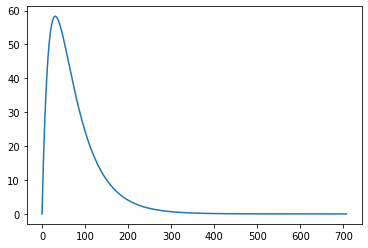

In [7]:
pali = LAIsim.LAIsim('Paliperidone 12 weekly')
# Pharmacokinetic parameters from  https://accp1.onlinelibrary.wiley.com/doi/abs/10.1002/jcph.597
# Ravenstijn, P., Remmerie, B., Savitz, A., Samtani, M.N., Nuamah, I., Chang, C.-T., De Meulder, M., Hough, D. and Gopal, S. (2016), Pharmacokinetics, safety, and tolerability of paliperidone palmitate 3-month formulation in patients with schizophrenia: A phase-1, single-dose, randomized, open-label study. The Journal of Clinical Pharmacology, 56: 330-339. https://doi.org/10.1002/jcph.597
pali.pk_tune(23, 56.3, 68.5)
paliperidone_plasma_level = pali.simulate_n(30, 90)
plt.plot(pali.curve[0:720])
plt.show()

In [8]:
pali.popt


array([1.02279463e+02, 5.27852279e-02, 1.82677919e-02])

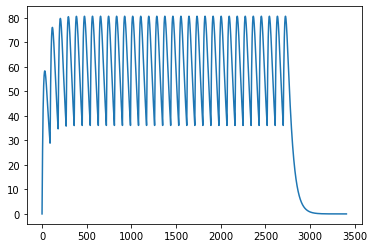

In [9]:
plt.plot(paliperidone_plasma_level[:365*10])
plt.show()

In [10]:
pali.save()

/home/claire/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


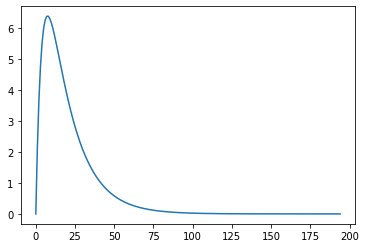

In [11]:
clopixol = LAIsim.LAIsim('Zuclopenthixol')
# Pharmacokinetic data from Produce Monograph https://www.lundbeck.com/content/dam/lundbeck-com/americas/canada/products/files/clopixol_product_monograph_english.pdf
clopixol.pk_tune(5, 6, 19)
plt.plot(clopixol.curve)
plt.show()

In [12]:
clopixol.popt

array([39.14516555,  0.06360074,  0.24141824])

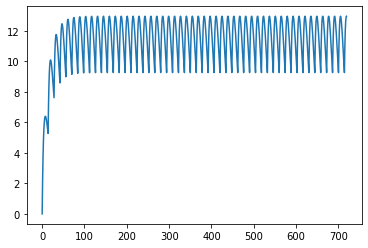

In [13]:
clopixol_plasma_level = clopixol.simulate_n(26*10, 14)
clopixol.save()
plt.plot(clopixol_plasma_level[:720])
plt.show()

/home/claire/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


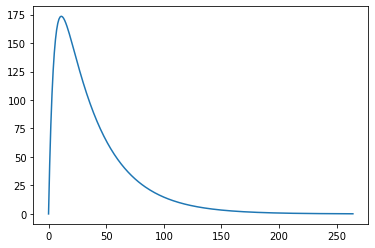

In [14]:
aripiprazole = LAIsim.LAIsim('Aripiprazole')
# Pharmacokinetic data from  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5409034/
# Raoufinia, Arash et al. “Aripiprazole Once-Monthly 400 mg: Comparison of Pharmacokinetics, Tolerability, and Safety of Deltoid Versus Gluteal Administration.” The international journal of neuropsychopharmacology vol. 20,4 (2017): 295-304. doi:10.1093/ijnp/pyw116
aripiprazole.pk_tune(24.1, 136, 24)
plt.plot(aripiprazole.curve)
plt.show()

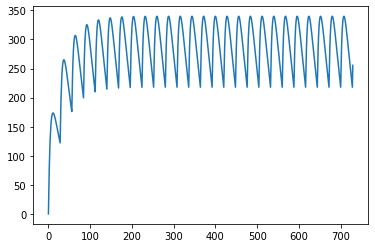

In [15]:
aripiprazole_plasma_level = aripiprazole.simulate_n(12*10, 28)
aripiprazole.save()
plt.plot(aripiprazole_plasma_level[:365*2])
plt.show()

/home/claire/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


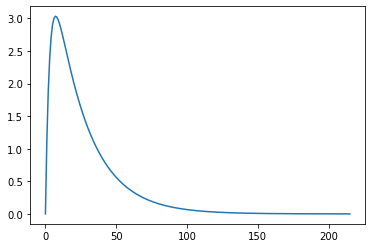

In [16]:
haloperidol = LAIsim.LAIsim('Haloperidol')
# Data extrapolated from https://www.accessdata.fda.gov/drugsatfda_docs/label/2011/018701s054lbl.pdf Manufactorer data submitted to FDA
haloperidol.pk_tune(6, 3, 21)
plt.plot(haloperidol.curve)
plt.show()

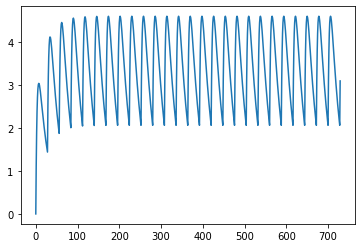

In [17]:
haloperidol_plasma_level = haloperidol.simulate_n(120, 28)
haloperidol.save()
plt.plot(haloperidol_plasma_level[:365*2])
plt.show()

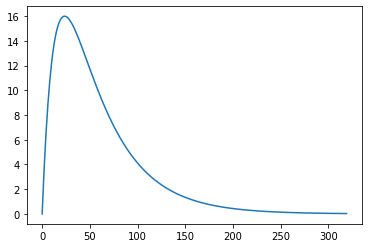

In [18]:
pali_monthly = LAIsim.LAIsim('Paliperidone 4 weekly')
# Data generated from https://accp1.onlinelibrary.wiley.com/doi/full/10.1002/cpdd.737
# Shimizu, H., Neyens, M., De Meulder, M., Gopal, S., Tsukamoto, Y., Samtani, M.N. and Remmerie, B. (2020), Population Pharmacokinetics of Paliperidone Palmitate (Once-Monthly Formulation) in Japanese, Korean, and Taiwanese Patients With Schizophrenia. Clinical Pharmacology in Drug Development, 9: 224-234. https://doi.org/10.1002/cpdd.737
# pali_monthly.pk_tune(18, 17.2, 45) produced unreaslistic curve either produce p0 estimates or manually created tdata/cdata as below
tdata = np.array([9, 18., 18.+45., 18.+2*45, 18.+3*45])
cdata = np.array([10, 17.2, 8., 4., 2.])
pali_monthly.tune(tdata, cdata, 720)
paliperidone_monthly_plasma_level = pali.simulate_n(120, 28)
plt.plot(pali_monthly.curve[0:320])
plt.show()

In [19]:
np.savez("plasma_levels", days = np.arange(1, 10*365), haloperidol = haloperidol_plasma_level, paliperidone = paliperidone_plasma_level, aripiprazole = aripiprazole_plasma_level, zuclopenthixol = clopixol_plasma_level, paliperidone_monthly = paliperidone_monthly_plasma_level, paliperidone_monthly_single = pali_monthly.curve, zuclopenthixol_single = clopixol.curve, haloperidol_single = haloperidol.curve, aripiprazole_single = aripiprazole.curve, paliperidone_single = pali.curve)

In [20]:
hair = Hair(haloperidol_plasma_level)

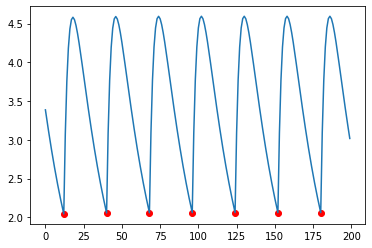

In [21]:
depot_days, _ = find_peaks(-hair.strand[100:300])
plt.plot(depot_days, hair.strand[100:300][depot_days], 'o', color='r')
plt.plot(hair.strand[100:300])
plt.show()

In [22]:
np.savez("strand_conc", days = np.arange(100, 300, 1), conc = hair.strand[100:300])
np.savez("strand_depot", days = depot_days, depots = hair.strand[100:300][depot_days])

In [23]:
segments = hair.segment_into_n(100)[2:22]
num_segments = len(segments)
analysis = Analyser(Analyser.homogenize(segments))

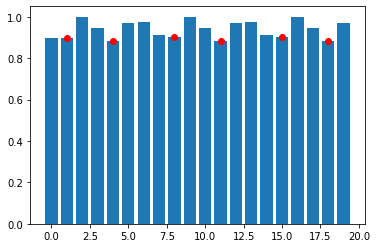

In [24]:
depot_days, _ = analysis.find_troughs()
plt.plot(depot_days, analysis.segments[depot_days], 'o', color='r')
plt.bar(range(num_segments), Analyser.homogenize(segments))
plt.show()

In [25]:
np.savez("segment_bars", days = range(num_segments), avg = Analyser.homogenize(segments))

In [26]:
np.savez("depot_days", days = depot_days, depots = analysis.segments[depot_days])

In [27]:
pali_monthly.popt

array([2.72042821e+01, 7.18075260e-02, 2.25926415e-02])